In [1]:
# Import the required libraries and dependencies
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Logistic Regression Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as lr
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

# Enable the Matplotlib property to allow diagrams to display in Jupyter Notebook
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

In [3]:
# Read the CSV file into a Pandas DataFrame
# Set the index using the Ticker column
df_feature = pd.read_csv(
    Path("../Data/Feature_Engineering_CL.csv"), 
    index_col="Date"
)

# Review the DataFrame
display(df_feature.head())
display(df_feature.columns)

,Open,High,Low,Close,Adj Close,Volume,Mid_hl,Mid_oc,Mid_hloc,Close_in_range,...,SMA_Signal_8_20Day_Mhloc,high_slope,high_intercept,mid_hl_slope,mid_hl_intercept,mid_oc_slope,mid_oc_intercept,low_slope,low_intercept,trend_10day
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-02 00:00:00-05:00,64.889999,65.029999,64.000000,64.300003,51.943378,3004300,64.514999,64.595001,64.555000,0.291265,...,1,0.065939,64.531333,0.071848,64.129334,0.070273,64.148000,0.077757,63.727335,1.0
2014-01-03 00:00:00-05:00,64.209999,64.489998,63.990002,64.180000,51.846432,2113700,64.240000,64.195000,64.217500,0.380000,...,1,0.087333,64.422666,0.083788,64.087667,0.087697,64.070665,0.080242,63.752668,1.0
2014-01-06 00:00:00-05:00,64.440002,64.550003,63.990002,64.139999,51.814137,2583500,64.270002,64.290001,64.280002,0.267852,...,1,0.071091,64.574000,0.082121,64.162333,0.077576,64.187332,0.093151,63.750667,1.0
2014-01-07 00:00:00-05:00,64.489998,64.580002,64.029999,64.199997,51.862579,2872100,64.305000,64.344997,64.324999,0.309086,...,1,0.067697,64.678665,0.072061,64.275665,0.071303,64.282332,0.076424,63.872665,1.0
2014-01-08 00:00:00-05:00,64.169998,64.199997,63.410000,63.540001,51.329430,3286300,63.804998,63.855000,63.829999,0.164559,...,1,0.017152,64.968665,0.026485,64.524332,0.027546,64.515999,0.035818,64.079999,1.0


Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Mid_hl',
       'Mid_oc', 'Mid_hloc', 'Close_in_range', 'Returns_1Day_Moc',
       'Returns_5Day_Moc', 'Returns_30Day_Moc', 'Returns_1Day_Mhloc',
       'Returns_5Day_Mhloc', 'Returns_30Day_Mhloc', 'Std_Dev_10Day_Moc',
       'Std_Dev_30Day_Moc', 'Std_Dev_10Day_Mhloc', 'Std_Dev_30Day_Mhloc',
       'SMA_Returns_8Day_Mhloc', 'SMA_Returns_20Day_Mhloc',
       'SMA_Delta_8_20Day_Mhloc', 'SMA_Signal_8_20Day_Mhloc', 'high_slope',
       'high_intercept', 'mid_hl_slope', 'mid_hl_intercept', 'mid_oc_slope',
       'mid_oc_intercept', 'low_slope', 'low_intercept', 'trend_10day'],
      dtype='object')

In [4]:
df_feature_1 = df_feature
drop_colums_feature = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Mid_hl', 'Mid_oc', 'Mid_hloc',
                        'high_slope','high_intercept', 'mid_hl_slope', 'mid_hl_intercept', 'mid_oc_slope', 'mid_oc_intercept', 'low_slope', 'low_intercept', 'trend_10day']
df_feature_1 = df_feature_1.dropna()
df_feature_1 = df_feature_1.drop(columns = drop_colums_feature)

# Review the DataFrame
print(f"Shape: {df_feature_1.shape}")
print(f"Columns/Features: {df_feature_1.columns}")
display(df_feature_1.head(10))
display(df_feature_1.tail(10))

Shape: (2226, 15)
Columns/Features: Index(['Close_in_range', 'Returns_1Day_Moc', 'Returns_5Day_Moc',
       'Returns_30Day_Moc', 'Returns_1Day_Mhloc', 'Returns_5Day_Mhloc',
       'Returns_30Day_Mhloc', 'Std_Dev_10Day_Moc', 'Std_Dev_30Day_Moc',
       'Std_Dev_10Day_Mhloc', 'Std_Dev_30Day_Mhloc', 'SMA_Returns_8Day_Mhloc',
       'SMA_Returns_20Day_Mhloc', 'SMA_Delta_8_20Day_Mhloc',
       'SMA_Signal_8_20Day_Mhloc'],
      dtype='object')


,Close_in_range,Returns_1Day_Moc,Returns_5Day_Moc,Returns_30Day_Moc,Returns_1Day_Mhloc,Returns_5Day_Mhloc,Returns_30Day_Mhloc,Std_Dev_10Day_Moc,Std_Dev_30Day_Moc,Std_Dev_10Day_Mhloc,Std_Dev_30Day_Mhloc,SMA_Returns_8Day_Mhloc,SMA_Returns_20Day_Mhloc,SMA_Delta_8_20Day_Mhloc,SMA_Signal_8_20Day_Mhloc
Date,,,,,,,,,,,,,,,
2014-02-14 00:00:00-05:00,0.798164,0.010504,0.028116,-0.031968,0.008723,0.026466,-0.032724,0.830718,1.627781,0.810795,1.631365,0.005943,0.008882,-0.002939,0
2014-02-18 00:00:00-05:00,0.453487,0.001519,0.023619,-0.024457,0.001361,0.021733,-0.026317,0.908165,1.611783,0.868981,1.615493,0.005662,0.008900,-0.003238,0
2014-02-19 00:00:00-05:00,0.120000,-0.013972,-0.004594,-0.039508,-0.011915,-0.003267,-0.038853,0.825151,1.603219,0.788845,1.606367,0.008731,0.009277,-0.000546,0
2014-02-20 00:00:00-05:00,0.671054,-0.001296,-0.007963,-0.041573,-0.001335,-0.007839,-0.040808,0.688008,1.589839,0.659763,1.592937,0.008785,0.009126,-0.000341,0
2014-02-21 00:00:00-05:00,0.029705,0.001459,-0.001939,-0.032809,0.003201,-0.000081,-0.030276,0.553469,1.584784,0.520163,1.586039,0.008624,0.008772,-0.000148,0
2014-02-24 00:00:00-05:00,0.415729,0.001943,-0.010395,-0.041734,0.000889,-0.007847,-0.040352,0.421981,1.548546,0.379322,1.549865,0.006971,0.008626,-0.001655,0
2014-02-25 00:00:00-05:00,0.709091,0.002828,-0.009102,-0.046774,0.000847,-0.008356,-0.048054,0.324645,1.475165,0.269653,1.475518,0.007012,0.008405,-0.001393,0
2014-02-26 00:00:00-05:00,0.132353,-0.000403,0.004534,-0.042673,0.001774,0.005382,-0.042617,0.324649,1.409833,0.269934,1.404829,0.006790,0.008350,-0.001559,0
2014-02-27 00:00:00-05:00,0.847457,-0.001612,0.004216,-0.043921,-0.003099,0.003606,-0.044037,0.322652,1.336833,0.268073,1.332043,0.005405,0.008268,-0.002863,0


,Close_in_range,Returns_1Day_Moc,Returns_5Day_Moc,Returns_30Day_Moc,Returns_1Day_Mhloc,Returns_5Day_Mhloc,Returns_30Day_Mhloc,Std_Dev_10Day_Moc,Std_Dev_30Day_Moc,Std_Dev_10Day_Mhloc,Std_Dev_30Day_Mhloc,SMA_Returns_8Day_Mhloc,SMA_Returns_20Day_Mhloc,SMA_Delta_8_20Day_Mhloc,SMA_Signal_8_20Day_Mhloc
Date,,,,,,,,,,,,,,,
2022-12-02 00:00:00-05:00,0.918366,0.000772,0.011306,0.099852,-0.001572,0.010949,0.097644,0.586847,1.841930,0.606727,1.844364,0.007150,0.006683,0.000467,0
2022-12-05 00:00:00-05:00,0.207796,-0.006682,0.010986,0.089116,-0.006010,0.010289,0.089164,0.568482,1.756541,0.583839,1.758776,0.007734,0.006835,0.000899,0
2022-12-06 00:00:00-05:00,0.530611,-0.001100,0.016455,0.071984,-0.001617,0.015924,0.072672,0.573663,1.714170,0.586853,1.709472,0.007744,0.006859,0.000885,0
2022-12-07 00:00:00-05:00,0.808828,0.002461,0.009587,0.069425,0.002267,0.009689,0.069050,0.585649,1.682397,0.593318,1.673479,0.007733,0.006840,0.000893,0
2022-12-08 00:00:00-05:00,0.972974,0.004586,0.000000,0.062005,0.004071,-0.002888,0.061994,0.617501,1.694142,0.614734,1.676661,0.007244,0.006733,0.000511,0
2022-12-09 00:00:00-05:00,0.121214,0.001479,0.000707,0.060101,0.003411,0.002089,0.059785,0.655566,1.708007,0.660530,1.696348,0.006389,0.005825,0.000564,0
2022-12-12 00:00:00-05:00,0.908258,0.005457,0.012937,0.070550,0.003592,0.011769,0.070761,0.675533,1.712983,0.677481,1.691428,0.005994,0.005793,0.000201,0
2022-12-13 00:00:00-05:00,0.510492,0.008940,0.023117,0.064331,0.008117,0.021633,0.061760,0.636332,1.785901,0.615613,1.757194,0.004687,0.005949,-0.001262,0
2022-12-14 00:00:00-05:00,0.606298,0.001772,0.022415,0.073158,0.003867,0.023264,0.071419,0.666250,1.830679,0.650260,1.809489,0.004663,0.005775,-0.001112,0


In [5]:
# Read the CSV file into a Pandas DataFrame
# Set the index using the Ticker column
df_target = pd.read_csv(
    Path("../Data/Feature_Engineering_RY.csv"), 
    index_col="Date"
)

# Review the DataFrame
df_target.head()

,Open,High,Low,Close,Adj Close,Volume,Mid_hl,Mid_oc,Mid_hloc,Close_in_range,...,SMA_Signal_8_20Day_Mhloc,high_slope,high_intercept,mid_hl_slope,mid_hl_intercept,mid_oc_slope,mid_oc_intercept,low_slope,low_intercept,trend_10day
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-02 00:00:00-05:00,71.300003,71.639999,70.779999,71.589996,49.878262,1576100,71.209999,71.445000,71.327499,0.941857,...,1,-0.020970,71.529333,-0.000273,71.150000,-0.015939,71.263666,0.020424,70.770666,0.0
2014-01-03 00:00:00-05:00,71.370003,71.459999,71.110001,71.389999,49.738911,1243400,71.285000,71.380001,71.332500,0.800000,...,1,-0.008849,71.434667,0.002273,71.127000,0.002758,71.135333,0.013394,70.819334,1.0
2014-01-06 00:00:00-05:00,71.449997,71.500000,70.610001,70.699997,49.258179,2737700,71.055000,71.074997,71.064999,0.101120,...,1,0.031758,71.269334,0.036273,70.970001,0.037121,70.958332,0.040788,70.670668,1.0
2014-01-07 00:00:00-05:00,71.000000,71.440002,70.970001,70.970001,49.446289,1374100,71.205002,70.985001,71.095001,0.000000,...,1,0.112727,70.960001,0.093576,70.785334,0.096606,70.759667,0.074424,70.610667,1.0
2014-01-08 00:00:00-05:00,70.959999,71.180000,70.669998,71.000000,49.467197,1293700,70.924999,70.980000,70.952499,0.647060,...,1,0.199939,70.671333,0.184333,70.473667,0.166152,70.572666,0.168727,70.276000,1.0


In [6]:
df_target_1 = df_target[['trend_10day']]

# Review the DataFrame
print(f"Shape: {df_target_1.shape}")
print(f"Columns/Features: {df_target_1.columns}")
display(df_target_1.head(10))
display(df_target_1.tail(10))

Shape: (2258, 1)
Columns/Features: Index(['trend_10day'], dtype='object')


,trend_10day
Date,
2014-01-02 00:00:00-05:00,0.0
2014-01-03 00:00:00-05:00,1.0
2014-01-06 00:00:00-05:00,1.0
2014-01-07 00:00:00-05:00,1.0
2014-01-08 00:00:00-05:00,1.0
2014-01-09 00:00:00-05:00,1.0
2014-01-10 00:00:00-05:00,1.0
2014-01-13 00:00:00-05:00,1.0
2014-01-14 00:00:00-05:00,0.0


,trend_10day
Date,
2022-12-15 00:00:00-05:00,NaN
2022-12-16 00:00:00-05:00,NaN
2022-12-19 00:00:00-05:00,NaN
2022-12-20 00:00:00-05:00,NaN
2022-12-21 00:00:00-05:00,NaN
2022-12-22 00:00:00-05:00,NaN
2022-12-23 00:00:00-05:00,NaN
2022-12-28 00:00:00-05:00,NaN
2022-12-29 00:00:00-05:00,NaN


In [7]:
df_model = pd.concat([df_feature_1, df_target_1], axis="columns", join="inner")

# Review the DataFrame
print(f"Shape: {df_model.shape}")
print(f"Columns/Features: {df_model.columns}")
display(df_model.head(10))
display(df_model.tail(10))

Shape: (2180, 16)
Columns/Features: Index(['Close_in_range', 'Returns_1Day_Moc', 'Returns_5Day_Moc',
       'Returns_30Day_Moc', 'Returns_1Day_Mhloc', 'Returns_5Day_Mhloc',
       'Returns_30Day_Mhloc', 'Std_Dev_10Day_Moc', 'Std_Dev_30Day_Moc',
       'Std_Dev_10Day_Mhloc', 'Std_Dev_30Day_Mhloc', 'SMA_Returns_8Day_Mhloc',
       'SMA_Returns_20Day_Mhloc', 'SMA_Delta_8_20Day_Mhloc',
       'SMA_Signal_8_20Day_Mhloc', 'trend_10day'],
      dtype='object')


,Close_in_range,Returns_1Day_Moc,Returns_5Day_Moc,Returns_30Day_Moc,Returns_1Day_Mhloc,Returns_5Day_Mhloc,Returns_30Day_Mhloc,Std_Dev_10Day_Moc,Std_Dev_30Day_Moc,Std_Dev_10Day_Mhloc,Std_Dev_30Day_Mhloc,SMA_Returns_8Day_Mhloc,SMA_Returns_20Day_Mhloc,SMA_Delta_8_20Day_Mhloc,SMA_Signal_8_20Day_Mhloc,trend_10day
Date,,,,,,,,,,,,,,,,
2014-02-14 00:00:00-05:00,0.798164,0.010504,0.028116,-0.031968,0.008723,0.026466,-0.032724,0.830718,1.627781,0.810795,1.631365,0.005943,0.008882,-0.002939,0,1.0
2014-02-18 00:00:00-05:00,0.453487,0.001519,0.023619,-0.024457,0.001361,0.021733,-0.026317,0.908165,1.611783,0.868981,1.615493,0.005662,0.008900,-0.003238,0,1.0
2014-02-19 00:00:00-05:00,0.120000,-0.013972,-0.004594,-0.039508,-0.011915,-0.003267,-0.038853,0.825151,1.603219,0.788845,1.606367,0.008731,0.009277,-0.000546,0,0.0
2014-02-20 00:00:00-05:00,0.671054,-0.001296,-0.007963,-0.041573,-0.001335,-0.007839,-0.040808,0.688008,1.589839,0.659763,1.592937,0.008785,0.009126,-0.000341,0,0.0
2014-02-21 00:00:00-05:00,0.029705,0.001459,-0.001939,-0.032809,0.003201,-0.000081,-0.030276,0.553469,1.584784,0.520163,1.586039,0.008624,0.008772,-0.000148,0,0.0
2014-02-24 00:00:00-05:00,0.415729,0.001943,-0.010395,-0.041734,0.000889,-0.007847,-0.040352,0.421981,1.548546,0.379322,1.549865,0.006971,0.008626,-0.001655,0,0.0
2014-02-25 00:00:00-05:00,0.709091,0.002828,-0.009102,-0.046774,0.000847,-0.008356,-0.048054,0.324645,1.475165,0.269653,1.475518,0.007012,0.008405,-0.001393,0,0.0
2014-02-26 00:00:00-05:00,0.132353,-0.000403,0.004534,-0.042673,0.001774,0.005382,-0.042617,0.324649,1.409833,0.269934,1.404829,0.006790,0.008350,-0.001559,0,0.0
2014-02-27 00:00:00-05:00,0.847457,-0.001612,0.004216,-0.043921,-0.003099,0.003606,-0.044037,0.322652,1.336833,0.268073,1.332043,0.005405,0.008268,-0.002863,0,0.0


,Close_in_range,Returns_1Day_Moc,Returns_5Day_Moc,Returns_30Day_Moc,Returns_1Day_Mhloc,Returns_5Day_Mhloc,Returns_30Day_Mhloc,Std_Dev_10Day_Moc,Std_Dev_30Day_Moc,Std_Dev_10Day_Mhloc,Std_Dev_30Day_Mhloc,SMA_Returns_8Day_Mhloc,SMA_Returns_20Day_Mhloc,SMA_Delta_8_20Day_Mhloc,SMA_Signal_8_20Day_Mhloc,trend_10day
Date,,,,,,,,,,,,,,,,
2022-12-02 00:00:00-05:00,0.918366,0.000772,0.011306,0.099852,-0.001572,0.010949,0.097644,0.586847,1.841930,0.606727,1.844364,0.007150,0.006683,0.000467,0,0.0
2022-12-05 00:00:00-05:00,0.207796,-0.006682,0.010986,0.089116,-0.006010,0.010289,0.089164,0.568482,1.756541,0.583839,1.758776,0.007734,0.006835,0.000899,0,0.0
2022-12-06 00:00:00-05:00,0.530611,-0.001100,0.016455,0.071984,-0.001617,0.015924,0.072672,0.573663,1.714170,0.586853,1.709472,0.007744,0.006859,0.000885,0,0.0
2022-12-07 00:00:00-05:00,0.808828,0.002461,0.009587,0.069425,0.002267,0.009689,0.069050,0.585649,1.682397,0.593318,1.673479,0.007733,0.006840,0.000893,0,0.0
2022-12-08 00:00:00-05:00,0.972974,0.004586,0.000000,0.062005,0.004071,-0.002888,0.061994,0.617501,1.694142,0.614734,1.676661,0.007244,0.006733,0.000511,0,0.0
2022-12-09 00:00:00-05:00,0.121214,0.001479,0.000707,0.060101,0.003411,0.002089,0.059785,0.655566,1.708007,0.660530,1.696348,0.006389,0.005825,0.000564,0,0.0
2022-12-12 00:00:00-05:00,0.908258,0.005457,0.012937,0.070550,0.003592,0.011769,0.070761,0.675533,1.712983,0.677481,1.691428,0.005994,0.005793,0.000201,0,0.0
2022-12-13 00:00:00-05:00,0.510492,0.008940,0.023117,0.064331,0.008117,0.021633,0.061760,0.636332,1.785901,0.615613,1.757194,0.004687,0.005949,-0.001262,0,0.0
2022-12-14 00:00:00-05:00,0.606298,0.001772,0.022415,0.073158,0.003867,0.023264,0.071419,0.666250,1.830679,0.650260,1.809489,0.004663,0.005775,-0.001112,0,0.0


In [8]:
# Train Test Split
df_model = df_model.dropna()

# Train 2014 through 2017
df_train = df_model.loc['2014-01-01':'2017-12-31']

# Test 2018
df_test = df_model.loc['2018-01-01':'2018-12-31']


In [9]:
# Training: Set X and Y variables for model
Y_Train = df_train[['trend_10day']]
X_Train = df_train.drop(columns = ['trend_10day'])

# Review training data
print(f"df_train X - Shape: {X_Train.shape} Columns/Features: {X_Train.columns}")
print(f"df_train y - Shape: {Y_Train.shape} Columns/Features: {Y_Train.columns}")
display(X_Train.head(5))
display(Y_Train.head(5))

df_train X - Shape: (957, 15) Columns/Features: Index(['Close_in_range', 'Returns_1Day_Moc', 'Returns_5Day_Moc',
       'Returns_30Day_Moc', 'Returns_1Day_Mhloc', 'Returns_5Day_Mhloc',
       'Returns_30Day_Mhloc', 'Std_Dev_10Day_Moc', 'Std_Dev_30Day_Moc',
       'Std_Dev_10Day_Mhloc', 'Std_Dev_30Day_Mhloc', 'SMA_Returns_8Day_Mhloc',
       'SMA_Returns_20Day_Mhloc', 'SMA_Delta_8_20Day_Mhloc',
       'SMA_Signal_8_20Day_Mhloc'],
      dtype='object')
df_train y - Shape: (957, 1) Columns/Features: Index(['trend_10day'], dtype='object')


,Close_in_range,Returns_1Day_Moc,Returns_5Day_Moc,Returns_30Day_Moc,Returns_1Day_Mhloc,Returns_5Day_Mhloc,Returns_30Day_Mhloc,Std_Dev_10Day_Moc,Std_Dev_30Day_Moc,Std_Dev_10Day_Mhloc,Std_Dev_30Day_Mhloc,SMA_Returns_8Day_Mhloc,SMA_Returns_20Day_Mhloc,SMA_Delta_8_20Day_Mhloc,SMA_Signal_8_20Day_Mhloc
Date,,,,,,,,,,,,,,,
2014-02-14 00:00:00-05:00,0.798164,0.010504,0.028116,-0.031968,0.008723,0.026466,-0.032724,0.830718,1.627781,0.810795,1.631365,0.005943,0.008882,-0.002939,0
2014-02-18 00:00:00-05:00,0.453487,0.001519,0.023619,-0.024457,0.001361,0.021733,-0.026317,0.908165,1.611783,0.868981,1.615493,0.005662,0.008900,-0.003238,0
2014-02-19 00:00:00-05:00,0.120000,-0.013972,-0.004594,-0.039508,-0.011915,-0.003267,-0.038853,0.825151,1.603219,0.788845,1.606367,0.008731,0.009277,-0.000546,0
2014-02-20 00:00:00-05:00,0.671054,-0.001296,-0.007963,-0.041573,-0.001335,-0.007839,-0.040808,0.688008,1.589839,0.659763,1.592937,0.008785,0.009126,-0.000341,0
2014-02-21 00:00:00-05:00,0.029705,0.001459,-0.001939,-0.032809,0.003201,-0.000081,-0.030276,0.553469,1.584784,0.520163,1.586039,0.008624,0.008772,-0.000148,0


,trend_10day
Date,
2014-02-14 00:00:00-05:00,1.0
2014-02-18 00:00:00-05:00,1.0
2014-02-19 00:00:00-05:00,0.0
2014-02-20 00:00:00-05:00,0.0
2014-02-21 00:00:00-05:00,0.0


In [10]:
# Training: Set X and Y variables for model
Y_Test = df_test[['trend_10day']]
X_Test = df_test.drop(columns = ['trend_10day'])

# Review training data
print(f"df_train X - Shape: {X_Test.shape} Columns/Features: {X_Test.columns}")
print(f"df_train Y - Shape: {Y_Test.shape} Columns/Features: {Y_Test.columns}")
display(X_Test.head(5))
display(Y_Test.head(5))

df_train X - Shape: (245, 15) Columns/Features: Index(['Close_in_range', 'Returns_1Day_Moc', 'Returns_5Day_Moc',
       'Returns_30Day_Moc', 'Returns_1Day_Mhloc', 'Returns_5Day_Mhloc',
       'Returns_30Day_Mhloc', 'Std_Dev_10Day_Moc', 'Std_Dev_30Day_Moc',
       'Std_Dev_10Day_Mhloc', 'Std_Dev_30Day_Mhloc', 'SMA_Returns_8Day_Mhloc',
       'SMA_Returns_20Day_Mhloc', 'SMA_Delta_8_20Day_Mhloc',
       'SMA_Signal_8_20Day_Mhloc'],
      dtype='object')
df_train Y - Shape: (245, 1) Columns/Features: Index(['trend_10day'], dtype='object')


,Close_in_range,Returns_1Day_Moc,Returns_5Day_Moc,Returns_30Day_Moc,Returns_1Day_Mhloc,Returns_5Day_Mhloc,Returns_30Day_Mhloc,Std_Dev_10Day_Moc,Std_Dev_30Day_Moc,Std_Dev_10Day_Mhloc,Std_Dev_30Day_Mhloc,SMA_Returns_8Day_Mhloc,SMA_Returns_20Day_Mhloc,SMA_Delta_8_20Day_Mhloc,SMA_Signal_8_20Day_Mhloc
Date,,,,,,,,,,,,,,,
2018-01-02 00:00:00-05:00,0.258623,-0.001393,0.002864,0.035130,-0.001127,0.004131,0.036592,0.423501,1.265484,0.385952,1.259413,0.002626,0.005918,-0.003292,0
2018-01-03 00:00:00-05:00,0.179241,-0.004051,-0.004448,0.039945,-0.003550,-0.003352,0.040679,0.261018,1.257677,0.245343,1.255187,0.003102,0.005268,-0.002167,0
2018-01-04 00:00:00-05:00,0.357143,0.002801,-0.003776,0.044233,0.003263,-0.001954,0.045198,0.231279,1.245149,0.236112,1.248731,0.003078,0.004735,-0.001657,0
2018-01-05 00:00:00-05:00,0.636357,0.003591,0.002591,0.044791,0.001062,0.001960,0.042799,0.229337,1.244724,0.215780,1.247313,0.002961,0.004663,-0.001702,0
2018-01-08 00:00:00-05:00,0.841272,-0.001524,-0.000597,0.046240,-0.001061,-0.001425,0.045814,0.159987,1.218934,0.142201,1.219108,0.002839,0.003980,-0.001142,0


,trend_10day
Date,
2018-01-02 00:00:00-05:00,1.0
2018-01-03 00:00:00-05:00,1.0
2018-01-04 00:00:00-05:00,1.0
2018-01-05 00:00:00-05:00,1.0
2018-01-08 00:00:00-05:00,1.0


In [11]:
# Convert Y variables from Dataframe to Series

Y_Test = Y_Test['trend_10day']
Y_Train = Y_Train['trend_10day']


In [12]:
# Create Model
classifier = lr(solver='lbfgs', random_state = 1)
classifier.fit(X_Train, Y_Train)
predictions_train=classifier.predict(X_Train)
predictions_test=classifier.predict(X_Test)

# Add predictions to Datadrame            
df_prediction_train = pd.DataFrame({"prediction":predictions_train,"actual":Y_Train} )
df_prediction_test = pd.DataFrame({"prediction":predictions_test,"actual":Y_Test} )

# Logistic Regression reports
Test_Report = classification_report_imbalanced(Y_Test,predictions_test)
Test_Matrix = confusion_matrix(Y_Test,predictions_test)
print(Test_Report) 
print(Test_Matrix) 

#sklearn.metrics.accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)[source]¶
train_accuracy =  accuracy_score(df_prediction_train['actual'], df_prediction_train['prediction'])
test_accuracy =  accuracy_score(df_prediction_test['actual'], df_prediction_test['prediction'])

#sklearn.metrics.recall_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')[source]
train_recall = recall_score(df_prediction_train['actual'], df_prediction_train['prediction'], average=None)
test_recall = recall_score(df_prediction_test['actual'], df_prediction_test['prediction'], average=None)

#sklearn.metrics.precision_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')[source]            
train_precision = precision_score(df_prediction_train['actual'], df_prediction_train['prediction'], average=None)
test_precision = precision_score(df_prediction_test['actual'], df_prediction_test['prediction'], average=None)

df_performance = pd.DataFrame({"train_accuracy":train_accuracy, "train_reall_0":train_recall[0], "train_reall_1":train_recall[1], "train_precision_0":train_precision[0], "train_precision_1":train_precision[1]
                               , "test_accuracy":test_accuracy, "test_recall_0":test_recall[0], "test_recall_1":test_recall[1], "test_precision_0":test_precision[0], "test_precision_1":test_precision[1]}, index = ['RY'])

display(df_performance)

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.00      0.00      1.00      0.00      0.00      0.00       129
        1.0       0.47      1.00      0.00      0.64      0.00      0.00       116

avg / total       0.22      0.47      0.53      0.30      0.00      0.00       245

[[  0 129]
 [  0 116]]


C:\Users\jersk\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jersk\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,train_accuracy,train_reall_0,train_reall_1,train_precision_0,train_precision_1,test_accuracy,test_recall_0,test_recall_1,test_precision_0,test_precision_1
RY,0.576803,0.002463,1.0,1.0,0.57636,0.473469,0.0,1.0,0.0,0.473469


In [13]:
df_prediction_test

,prediction,actual
Date,,
2018-01-02 00:00:00-05:00,1.0,1.0
2018-01-03 00:00:00-05:00,1.0,1.0
2018-01-04 00:00:00-05:00,1.0,1.0
2018-01-05 00:00:00-05:00,1.0,1.0
2018-01-08 00:00:00-05:00,1.0,1.0
...,...,...
2018-12-20 00:00:00-05:00,1.0,1.0
2018-12-21 00:00:00-05:00,1.0,1.0
2018-12-24 00:00:00-05:00,1.0,1.0


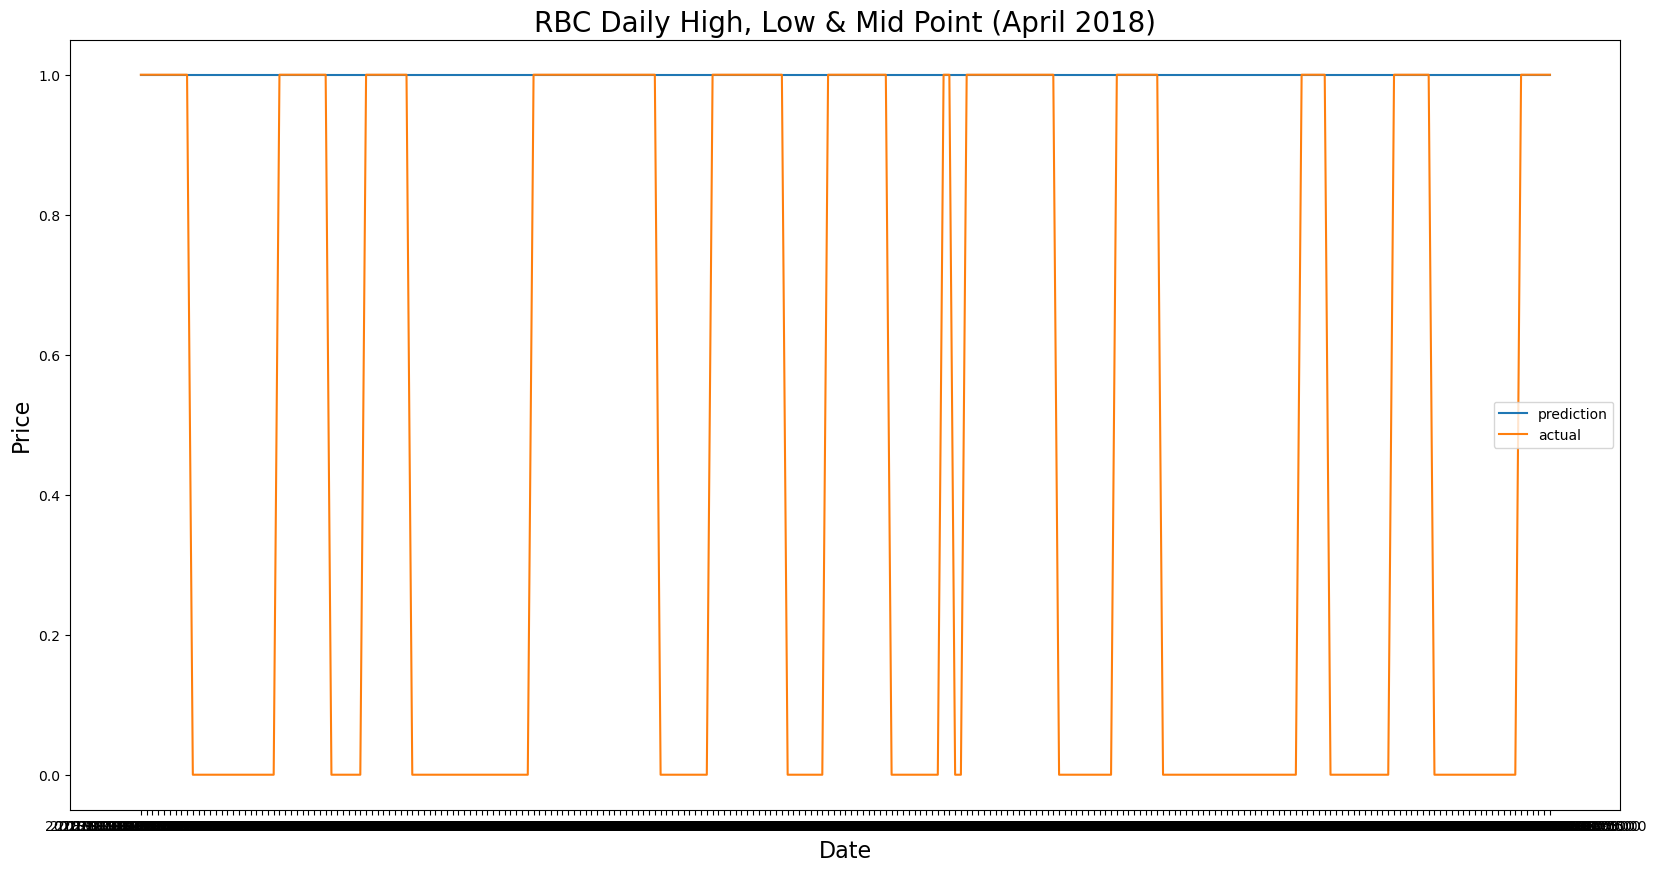

In [14]:
# Plot daily returns of all portfolios
fig = plt.figure(figsize=(20,10))

plt.plot(df_prediction_test)
plt.title("RBC Daily High, Low & Mid Point (April 2018)", fontsize = 20)
plt.ylabel("Price", fontsize = 16)
plt.xlabel("Date", fontsize = 16)
plt.legend(df_prediction_test.columns)
#plt.grid()

plt.show()

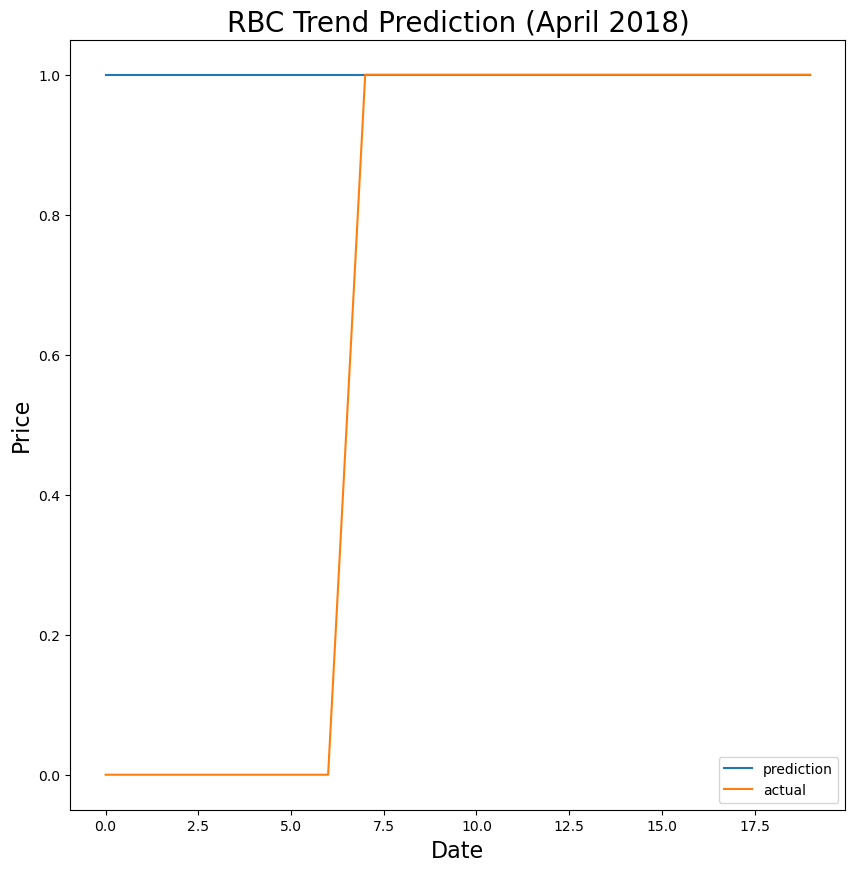

In [15]:
# Data April 2018
df_plt2 = df_prediction_test.loc['2018-04-01':'2018-04-30']
df_plt2 = df_plt2.reset_index()
df_plt2 = df_plt2.drop(columns = ['Date'])
df_plt2.columns

# Plot daily returns of all portfolios
fig = plt.figure(figsize=(10,10))

plt.plot(df_plt2)
plt.title("RBC Trend Prediction (April 2018)", fontsize = 20)
plt.ylabel("Price", fontsize = 16)
plt.xlabel("Date", fontsize = 16)
plt.legend(df_plt2.columns)
#plt.grid()

plt.show()

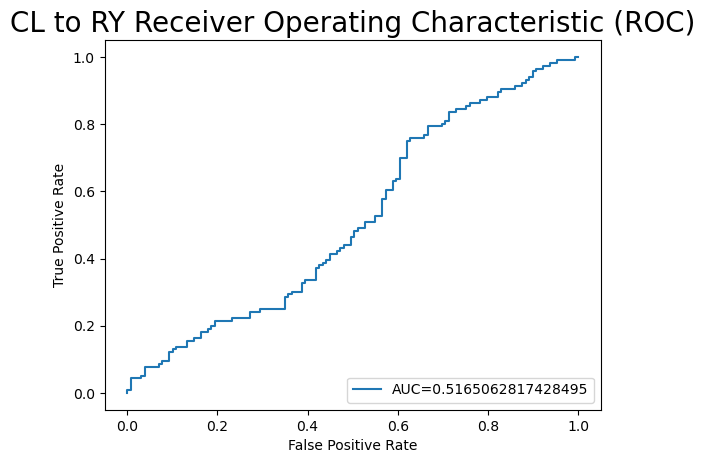

In [16]:
X_test = X_Test
y_test = Y_Test
y_pred_proba = predictions_test
log_regression = classifier

#define metrics
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.title("CL to RY Receiver Operating Characteristic (ROC)", fontsize = 20)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()